In [1]:
from PIL import Image
import numpy as np

def tif2array(image_path):
    ## Imports an arbitrary .tif image and creates a numpy array with the pixel-values
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_ground_truth(image_path = "./data/groundTruth.tif"):
    ## Imports a .tif image with the ground truth (drosophila wing) 
    ## and creates a numpy array with the pixel-values
    
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_raw_data(image_path = "./data/rawData.tif"):
    ## Imports a .tif image with the raw data (drosophila wing)
    ## and creates a numpy array with the pixel-values
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_crop(image_path="./data/rawData.tif", origin=(400,400), length=100, width=100):
    ## Imports an arbitrary .tif image region
    ## and creates a numpy array with the pixel-values

    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])[origin[0]:origin[0]+length,origin[1]:origin[1]+width]

In [11]:
p = load_crop(image_path="./data/groundTruth.tif")

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

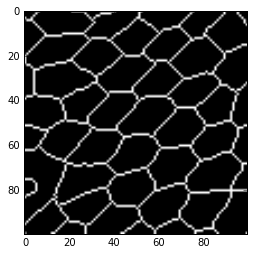

In [40]:
plt.imshow(p, cmap="gray")

In [14]:
from gputools import convolve

In [85]:
x = np.linspace(-3,3,7)
y = np.linspace(-3,3,7)

In [103]:
x

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [87]:
xx,yy = np.array(np.meshgrid(x,y))

In [94]:
ga = np.exp(-(xx*xx+yy*yy)/.000005)/(np.pi*.000005)

In [95]:
ga.shape

(7, 7)

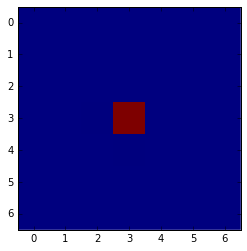

In [96]:
plt.imshow(ga, interpolation='none')

In [101]:
blur = convolve(p,ga)

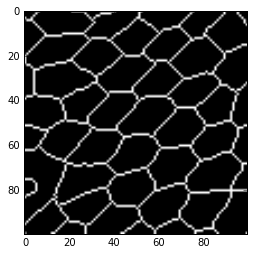

In [102]:
plt.imshow(blur, cmap="gray")

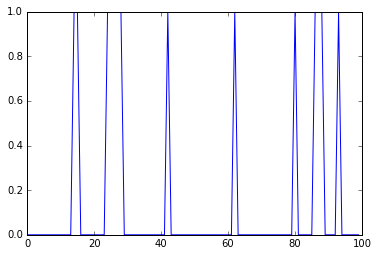

In [99]:
plt.plot(p[50,:]/255)

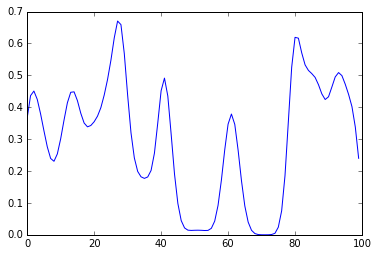

In [100]:
plt.plot(blur[50,:]/255)

In [58]:
import scipy.signal

In [70]:
blur_sci = scipy.signal.convolve(p, ga, mode='full')

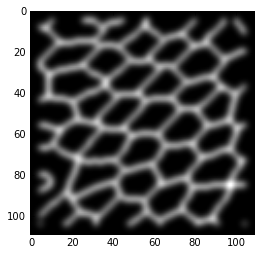

In [71]:
plt.imshow(blur_sci, cmap="gray")